In [155]:
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [156]:
# Parameters
vocab_size = 10000
max_length = 32
embedding_dim = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=20000

In [157]:
with open("../data/news/Sarcasm_Headlines_Dataset.json") as file_in:
    dataset = []
    for line in file_in:
        dataset.append(json.loads(line))

## function for model training

In [158]:
# Plot utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [159]:
def model_trining(vocab_size,embedding_dim,max_len,num_epochs,X_train,y_train,X_test,y_test):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_len),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
        
    ])
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
    print(model.summary())

    num_epochs=num_epochs
    history=model.fit(X_train,y_train,epochs=num_epochs,
                   validation_data=(X_test,y_test),verbose=2     
                )
    # Plot the accuracy and loss
    plot_graphs(history, "accuracy")
    plot_graphs(history, "loss")
    

In [160]:
sentences=[]
labels=[]
urls=[]
for item in dataset:
    sentences.append(item["headline"])
    labels.append(item["is_sarcastic"])
    urls.append(item["article_link"])

In [161]:
training_sentences=sentences[0:training_size]
testing_sentences=sentences[training_size:]
training_labels=labels[0:training_size]
testing_labels=labels[training_size:]

In [162]:
# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [163]:
# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [164]:
# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [165]:
# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [166]:
# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_29  (None, 16)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_58 (Dense)            (None, 24)                408       
                                                                 
 dense_59 (Dense)            (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
625/625 - 2s - loss: 0.5777 - accuracy: 0.6852 - val_loss: 0.4087 - val_accuracy: 0.8302 - 2s/epo

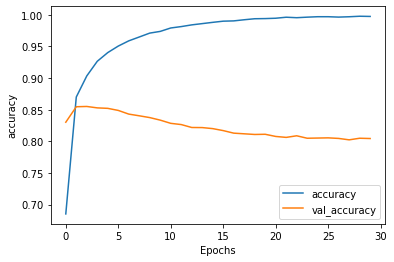

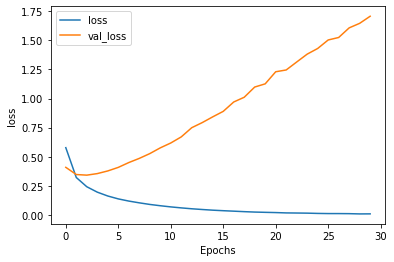

In [167]:
vocab_size = 10000
max_length = 32
embedding_dim = 16

model_trining(vocab_size,embedding_dim,max_length,30,training_padded,training_labels,testing_padded,testing_labels)

In [168]:
vocab_size = 1000
max_length = 16
embedding_dim = 16

model_trining(vocab_size,embedding_dim,max_length,30,training_padded,training_labels,testing_padded,testing_labels)

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 16, 16)            16000     
                                                                 
 global_average_pooling1d_30  (None, 16)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_60 (Dense)            (None, 24)                408       
                                                                 
 dense_61 (Dense)            (None, 1)                 25        
                                                                 
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30


ValueError: in user code:

    File "d:\data-science-projects\Deeplearning.ai\.venv\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "d:\data-science-projects\Deeplearning.ai\.venv\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\data-science-projects\Deeplearning.ai\.venv\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "d:\data-science-projects\Deeplearning.ai\.venv\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "d:\data-science-projects\Deeplearning.ai\.venv\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\data-science-projects\Deeplearning.ai\.venv\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_30" is incompatible with the layer: expected shape=(None, 16), found shape=(32, 32)
